<a href="https://colab.research.google.com/github/hafilmr/LearningCodeTrainee/blob/main/Exponential%20Smoothing/EWMA_and_Holt_Winters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exponentially-Weighted Moving Average (EWMA)



In [ ]:
!wget nc https://lazyprogrammer.me/course_files/airline_passengers.csv

--2022-02-03 07:15:10--  http://nc/
Resolving nc (nc)... failed: No address associated with hostname.
wget: unable to resolve host address ‘nc’
--2022-02-03 07:15:10--  https://lazyprogrammer.me/course_files/airline_passengers.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2036 (2.0K) [text/csv]
Saving to: ‘airline_passengers.csv.1’

airline_passengers. 100%[===================>]   1.99K  --.-KB/s    in 0s      

2022-02-03 07:15:11 (21.7 MB/s) - ‘airline_passengers.csv.1’ saved [2036/2036]

FINISHED --2022-02-03 07:15:11--
Total wall clock time: 0.3s
Downloaded: 1 files, 2.0K in 0s (21.7 MB/s)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/airline_passengers.csv', index_col='Month', parse_dates=True)

In [ ]:
df.head()

Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

In [ ]:
df.isna().sum()

Passengers    0
dtype: int64

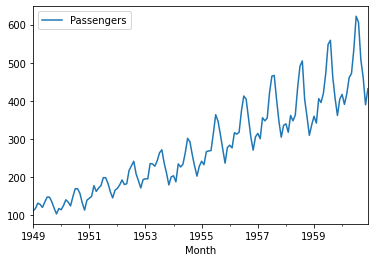

In [ ]:
df.plot()

In [ ]:
# set alpha values
alpha = 0.2

# choose a small value for alpha between 0 and 1, example=0.1, 0.2
# consider alpha = 1 = just copy original time series
# consider alpha = 0 = just copy itself
# consider alpha almost 1 = follow new samples more, more jagged
# consider alpha almost 0 = follow existing average more, more smooth

In [ ]:
df['EWMA'] = df['Passengers'].ewm(alpha=alpha, adjust=False).mean()

# ewm() is for Provide exponentially weighted (EW) calculations.

* When adjust=True (default), the EW function is calculated using weights
* When adjust=False, the exponentially weighted function is calculated recursively

In [ ]:
df

Passengers        EWMA
Month                             
1949-01-01         112  112.000000
1949-02-01         118  113.200000
1949-03-01         132  116.960000
1949-04-01         129  119.368000
1949-05-01         121  119.694400
...                ...         ...
1960-08-01         606  512.214093
1960-09-01         508  511.371274
1960-10-01         461  501.297019
1960-11-01         390  479.037615
1960-12-01         432  469.630092

[144 rows x 2 columns]

In [ ]:
type(df['Passengers'].ewm(alpha=alpha, adjust=False))

pandas.core.window.ewm.ExponentialMovingWindow

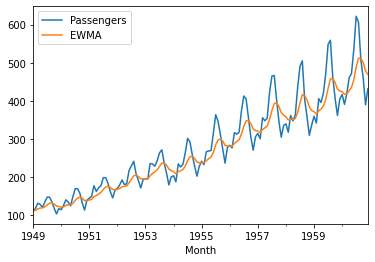

In [ ]:
df.plot()

In [ ]:
# Doing manual ewma
manual_ewma = []
for x in df['Passengers'].to_numpy():
  if len(manual_ewma) > 0:
    xhat = alpha * x + (1 - alpha) * manual_ewma[-1]
  else:
    xhat = x
  manual_ewma.append(xhat)
df['Manual'] = manual_ewma

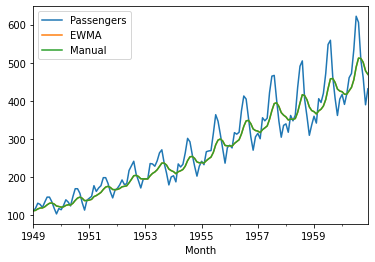

In [ ]:
df.plot()

In [ ]:
df

Passengers        EWMA      Manual
Month                                         
1949-01-01         112  112.000000  112.000000
1949-02-01         118  113.200000  113.200000
1949-03-01         132  116.960000  116.960000
1949-04-01         129  119.368000  119.368000
1949-05-01         121  119.694400  119.694400
...                ...         ...         ...
1960-08-01         606  512.214093  512.214093
1960-09-01         508  511.371274  511.371274
1960-10-01         461  501.297019  501.297019
1960-11-01         390  479.037615  479.037615
1960-12-01         432  469.630092  469.630092

[144 rows x 3 columns]

In [ ]:
df.drop(['Manual'], axis=1, inplace=True)

## Simple Exponential Smoothing



In [ ]:
!pip install -U statsmodels

In [ ]:
# import models
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [ ]:
# make the model - data is univariate (satu variabel)
ses = SimpleExpSmoothing(df['Passengers'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Notice that we get a warning which says no frequency information was provided, so inferred frequency `MS` will be used.

The reason for this is when we load it in our data frame, Pandas didn't automatically assign a frequency to the index.

Also, notice this second warning, which says after zero 13` initialization must be handled their model creation.`

So basically this controls how you determine the first value of the moving average in previous versions of Stats models. This was chosen automatically.

In [ ]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [ ]:
# based on warning which says no frequency information was provided
# so we inferred frequency `MS` will be used.
df.index.freq = 'MS'

# month start frequency

In [ ]:
# set initialization method to legacy heuristic.
ses = SimpleExpSmoothing(
    df['Passengers'],
    initialization_method='legacy-heuristic' #“legacy-heuristic” uses the same values that were used in statsmodels 0.11 and earlier.
)

In [ ]:
# fit the model
res = ses.fit(smoothing_level=alpha, optimized=False) 

In [ ]:
res

In [ ]:
# in sample predictions or our of sample forecast
res.predict(start=df.index[0], end=df.index[-1])

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    113.200000
1949-04-01    116.960000
1949-05-01    119.368000
                 ...    
1960-08-01    488.767616
1960-09-01    512.214093
1960-10-01    511.371274
1960-11-01    501.297019
1960-12-01    479.037615
Freq: MS, Length: 144, dtype: float64

In [ ]:
# in sample predictions or our of sample forecast

df['SES'] = res.predict(start=df.index[0], end=df.index[-1])

In [ ]:
# get all in-sample predictions
np.allclose(df['SES'], res.fittedvalues)

True

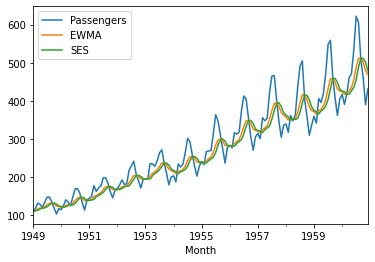

In [ ]:
df.plot()

In [ ]:
df

Passengers        EWMA         SES
Month                                         
1949-01-01         112  112.000000  112.000000
1949-02-01         118  113.200000  112.000000
1949-03-01         132  116.960000  113.200000
1949-04-01         129  119.368000  116.960000
1949-05-01         121  119.694400  119.368000
...                ...         ...         ...
1960-08-01         606  512.214093  488.767616
1960-09-01         508  511.371274  512.214093
1960-10-01         461  501.297019  511.371274
1960-11-01         390  479.037615  501.297019
1960-12-01         432  469.630092  479.037615

[144 rows x 3 columns]

In [ ]:
df['SES-1'] = df['SES'].shift(-1)

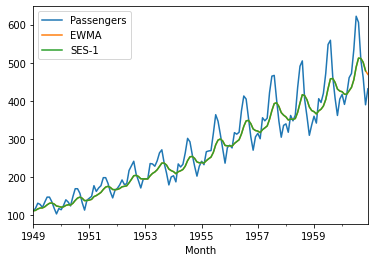

In [ ]:
# NO!, dont do thiss, this is just example, and this is wrong
df[['Passengers', 'EWMA', 'SES-1']].plot()

**So why is this wrong?**

Recall that the forecasting model is defined as slightly differently from the traditional EWM.

As you recall from the theory lecture, the forecasting time index is actually moved up by one step.

That EWM is represented by the level.

But the prediction why hat is actually assigns the level at the previous time step.

In other words, the SES model should be lagging behind by one time step.

So what we had plotted originally was correct.

You'll see in our later examples why this is true.

Remember that if we shift this, then we have to shift everything.

But you'll see that with whole winters', the full model, there is no need for shifting because it's actually the correct model and it will match up very nicely.

If we shift this, then we have to shift that to be consistent and you'll see that would be completely wrong.



In [ ]:
# We're gonna treat this like machine learning

N_test = 12
train = df.iloc[:-N_test]
test = df.iloc[-N_test:]

In [ ]:
train.head(), train.shape

(            Passengers      EWMA      SES     SES-1
 Month                                              
 1949-01-01         112  112.0000  112.000  112.0000
 1949-02-01         118  113.2000  112.000  113.2000
 1949-03-01         132  116.9600  113.200  116.9600
 1949-04-01         129  119.3680  116.960  119.3680
 1949-05-01         121  119.6944  119.368  119.6944, (132, 4))

In [ ]:
test.head(), test.shape

(            Passengers        EWMA         SES       SES-1
 Month                                                     
 1960-01-01         417  424.179686  425.974608  424.179686
 1960-02-01         391  417.543749  424.179686  417.543749
 1960-03-01         419  417.834999  417.543749  417.834999
 1960-04-01         461  426.467999  417.834999  426.467999
 1960-05-01         472  435.574399  426.467999  435.574399, (12, 4))

In [ ]:
ses = SimpleExpSmoothing(
    train['Passengers'],
    initialization_method='legacy-heuristic')
res = ses.fit()

The next step is to create indices which we can use to index our data frame.

We need this if we want to index only the train points or only the test points one at a time.

So to do this, we're basically going to create a one, array, of booleans.

It's going to be true for the rows, which corresponds to the correct data set, whether that's train or test.


In [ ]:
# boolean series to index df rows
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

So for the trains that we do, df dot index less than or equal to that train of minus one.

That is to say, any row where the index is less than or equal to the last training point belongs to the train.

So of course, this makes sense since the data set has been split in chronological order.

And using that, we know that the test index is just the opposite.

So we use greater then instead of less than or equal to.

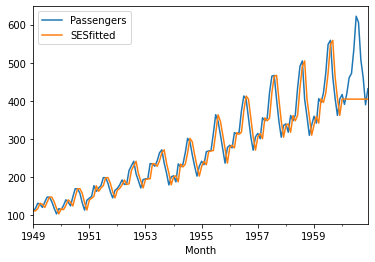

In [ ]:
df.loc[train_idx, 'SESfitted'] = res.fittedvalues #fitted values for data train
df.loc[test_idx, 'SESfitted'] = res.forecast(N_test) #forecast for data test
df[['Passengers', 'SESfitted']].plot()

In [ ]:
res.params

{'damping_trend': nan,
 'initial_level': 112.0,
 'initial_seasons': array([], dtype=float64),
 'initial_trend': nan,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.995,
 'smoothing_seasonal': nan,
 'smoothing_trend': nan,
 'use_boxcox': False}

As you can see, the result is, in fact, very nearly one **(smoothing level)**, that means our fit and model is simply doing nearly the night forecast, or in other words, it simply copies the last known value in the series.


## Holt Linear Trend Models

Holt Linear Trend Models aka Double Exponential Smoothing

In [ ]:
from statsmodels.tsa.holtwinters import Holt

In [ ]:
# Make the models
holt = Holt(
    df['Passengers'],
    initialization_method ='legacy-heuristic'
)

In [ ]:
# fit the models
res_h = holt.fit()

In [ ]:
# in-sample prediction or out-of-sample-forecast
df['Holt'] = res_h.fittedvalues

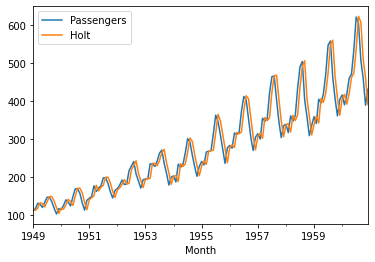

In [ ]:
df[['Passengers', 'Holt']].plot()

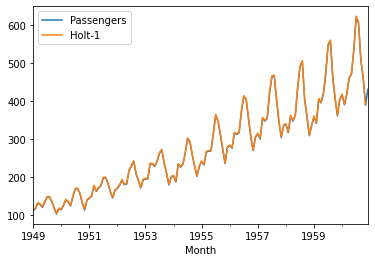

In [ ]:
# NO!, DONT DO THIS
df['Holt-1'] = df['Holt'].shift(-1)
df[['Passengers', 'Holt-1']].plot()

In [ ]:
holt = Holt(
    train['Passengers'], 
    initialization_method='legacy-heuristic')
res_h = holt.fit()
df.loc[train_idx, 'Holt'] = res_h.fittedvalues

In [ ]:
df.loc[test_idx, 'Holt'] = res_h.forecast(N_test)

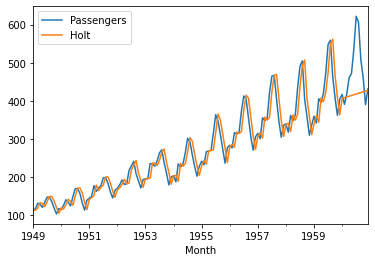

In [ ]:
df[['Passengers', 'Holt']].plot()

## Holt Winters

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

So the first variation we're going to try is the additive trend and additive seasonality, we set the seasonal periods, the 12, since we know that the data cycles yearly and the frequency of the data is monthly.


**Parameter:**
* Trend with value `add`
* Seasonal with value `add`

In [ ]:
# make the model
hw = ExponentialSmoothing(
    train['Passengers'],
    initialization_method='legacy-heuristic',
    trend='add', seasonal='add', seasonal_periods=12 #because we gonna use holt winter, so we're implement parameter trend, seasonal
) #trend/seasonal args can be add or mul. lets compare

# fit the model
res_hw = hw.fit()

In [ ]:
# in sample predictions (train)
df.loc[train_idx, 'HoltWinters'] = res_hw.fittedvalues

In [ ]:
# out of sample forecast (test)
df.loc[test_idx, 'HoltWinters'] = res_hw.forecast(N_test)

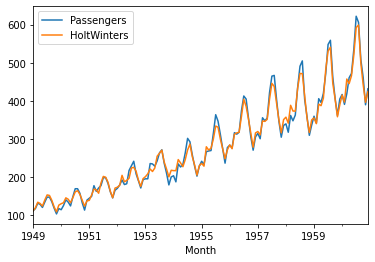

In [ ]:
df[['Passengers', 'HoltWinters']].plot()


So this is very encouraging, unlike the simple exponential smoothing model and the whole linear trend model.

This model fits very well for both a train and test notice, importantly, that the predictions are not lagging behind the Time series.

So hopefully now you are convinced that it is not correct to shift it backwards by one step. And in fact, the lagging is only due to model mis specification.

Remember that you have to be consistent.

If you shift back for one model, you have to shift back for all of them.
And for this model, that would be very silly because then the predictions would be ahead of the data, which doesn't make any sense.

In [ ]:
def rmse(y, t):
  return np.sqrt(np.mean((y - t)**2))

# y = predictions
# t = target

In [ ]:
def mae(y, t):
  return np.mean(np.abs(y - t))

In [ ]:
print('Train RMSE:', rmse(train['Passengers'], res_hw.fittedvalues))
print('Test RMSE:', rmse(test['Passengers'], res_hw.forecast(N_test)))

Train RMSE: 11.6246803154745
Test RMSE: 16.980328713846724


In [ ]:
print('Train MAE:', mae(train['Passengers'], res_hw.fittedvalues))
print('Test MAE:', mae(test['Passengers'], res_hw.forecast(N_test)))

Train MAE: 9.00812289021194
Test MAE: 13.381017046079075


Lets take a look to change parameter in trend and seasonal, between **`add`** or **`mul`**

**Parameter:**
* Trend with value `add`
* Seasonal with value `mul`

In [ ]:
hw = ExponentialSmoothing(
    train['Passengers'],
    initialization_method='legacy-heuristic',
    trend='add', seasonal='mul', seasonal_periods=12)
# add for additive
# mul for multiplicative

res_hw = hw.fit()

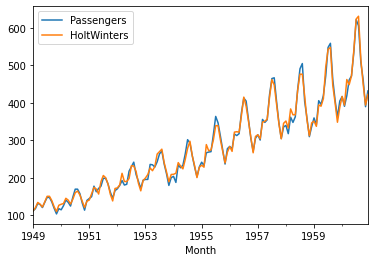

In [ ]:
df.loc[train_idx, 'HoltWinters'] = res_hw.fittedvalues
df.loc[test_idx, 'HoltWinters'] = res_hw.forecast(N_test)
df[['Passengers', 'HoltWinters']].plot()

So from my perspective, at least, this model appears to fit better than the purely additive model.
But let's check our accuracy metrics.


In [ ]:
print('Train RMSE:', rmse(train['Passengers'], res_hw.fittedvalues))
print('Test RMSE:', rmse(test['Passengers'], res_hw.forecast(N_test)))

Train RMSE: 9.767995232544234
Test RMSE: 15.810523438015542


In [ ]:
print('Train MAE:', mae(train['Passengers'], res_hw.fittedvalues))
print('Test MAE:', mae(test['Passengers'], res_hw.forecast(N_test)))

Train MAE: 7.604256298010503
Test MAE: 10.303303346874694


**Parameter:**
* Trend with value `mul`
* Seasonal with value `mul`

In [ ]:
hw = ExponentialSmoothing(
    train['Passengers'],
    initialization_method='legacy-heuristic',
    trend='mul', seasonal='mul', seasonal_periods=12
)
res_hw = hw.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


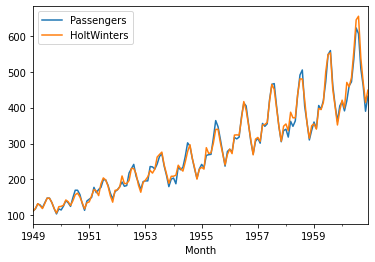

In [ ]:
df.loc[train_idx, 'HoltWinters'] = res_hw.fittedvalues
df.loc[test_idx, 'HoltWinters'] = res_hw.forecast(N_test)
df[['Passengers', 'HoltWinters']].plot()

In [ ]:
print('Train RMSE:', rmse(train['Passengers'], res_hw.fittedvalues))
print('Test RMSE:', rmse(test['Passengers'], res_hw.forecast(N_test)))

Train RMSE: 9.617924823780886
Test RMSE: 25.81030837798351


In [ ]:
print('Train RMSE:', mae(train['Passengers'], res_hw.fittedvalues))
print('Test RMSE:', mae(test['Passengers'], res_hw.forecast(N_test)))

Train RMSE: 7.112421243670695
Test RMSE: 20.84819954950004


Therefore, while this Time series may look like a multiplicative model is a better fit, it actually overfit to the training data and we get a worse result.
